In [36]:
import numpy as np
import matplotlib as plt
import pandas as pd

import torch
import torch.nn as nn

import glob
from skimage import io
from PIL import Image

from torch.utils.data import DataLoader, Sampler
from torchvision import datasets
from torchvision.transforms import transforms

import torchvision
from torch.utils.data import DataLoader, Sampler


import matplotlib.pyplot as plt
%matplotlib inline

### Old code

In [4]:
label_to_idx = {class_name.split("/")[-1]:idx for idx,class_name in enumerate(glob.iglob("../data/Training/*"))}

def LoadData(path, label_dict):
    X = []
    y = []
    
    for path_to_jpg in glob.iglob(path):
        gt, _ = path_to_jpg.split('/')[-2:]
        image = io.imread(path_to_jpg)
        X.append(image)
        y.append(label_dict[gt])
        
        
    return np.array(X), np.array(y)

X_train, y_train = LoadData(train_path, label_to_idx)
X_test, y_test  = LoadData(test_path, label_to_idx)


val_split = 0.2
batch_size = 64
train_size = X_train.shape[0]

split = int(np.floor(train_size * val_split))
indices = list(range(train_size))
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler, validation_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(list(zip(X_train,y_train)), batch_size = batch_size, sampler = train_sampler)
validation_loader = torch.utils.data.DataLoader(list(zip(X_train,y_train)), batch_size = batch_size, sampler = validation_sampler)

## Data Loading

In [3]:
train_path = "/home/timur/s2/projects/ConvNet_fruits360/data/Training"
test_path  = "/home/timur/s2/projects/ConvNet_fruits360/data/Test/"

In [40]:
dataset = datasets.ImageFolder(train_path, transform = transforms.ToTensor())

val_split = 0.2
batch_size= 64
train_size = dataset.__len__()

indice = list(range(train_size))
np.random.shuffle(indice)

split = round(val_split * train_size)
train_indices, val_indices = indice[split:], indice[:split]

train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices) 

train_loader = DataLoader(dataset=dataset, batch_size=32, sampler= train_sampler)
val_loader = DataLoader(dataset=dataset, batch_size=32, sampler = val_sampler)

### Random vilualization

In [5]:


def visualize_random_image(number):
    
        for num,idx in enumerate(np.random.randint(0, train_loader.dataset.__len__() , size = number)):
            path, target = train_loader.dataset.imgs[idx]
            img = Image.open(path)
            ax = plt.subplot(200+ number//2 * 10+1+num,)
            ax.set_title(train_dataset.class_to_idx.get(target))
            ax.imshow(img)
            ax.axis("off")

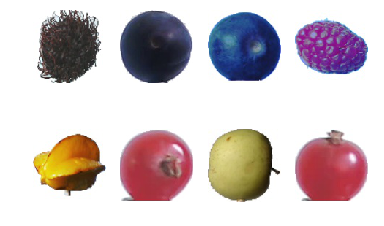

In [6]:
visualize_random_image(8)

### Batch layer

In [8]:
# Input - X (batch_size,(height, width, channels))
# dtype - torch.Tensor
# (64,100,100,3)

class BatchNormCustom(nn.Module):
    
    def __init__(self, gamma = 1, beta = 0, eps = 1e-5):
        super().__init__()
        self.X = None
        self.gamma = gamma
        self.beta = beta
        self.eps = eps
        
    def forward(self,X):
        self.X = X
        m  = X.shape[0]
        mu = torch.mul((1/m),torch.sum(X, 0))
        var = torch.mul((1/m),torch.sum((X - mu) ** 2, 0))
        X_norm = (X - mu)/torch.sqrt(var + self.eps)
        return  self.gamma * X_norm + self.beta

### Defining model, loss function, optimizer

In [7]:
# num_classes= 96
# model = nn.Sequential(nn.Conv2d(3,10,3, padding=0),
#                       nn.ReLU(inplace=True),
#                       nn.MaxPool2d(4),
#                       nn.Conv2d(10,10,3),
#                       nn.ReLU(inplace=True),
#                       nn.Linear(10*22*22 ,num_classes)
#                      )


NameError: name 'model' is not defined

In [23]:
class Flattener(nn.Module):  
    def __init__(self):
        self.X_shape = None
        
    def forward(self,X):
        self.X_shape = X.shape
        return X.view(self.X_shape[0],-1)
    
    
    def backward(self,d_out):
        return d_out.view(self.X_shape)

In [301]:
)

NameError: name 'X_shape' is not defined

In [20]:
model = nn.Sequential(nn.Conv2d(3,10,5),
                      nn.ReLU(inplace=True),
                      nn.MaxPool2d(4),
                      nn.Conv2d(10,10,5),
                      nn.ReLU(inplace=True),
                      nn.MaxPool2d(4),
                      Flattener(),
                      nn.Linear(10 * 5 *5, 96, bias = True)
                     )

loss_f = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

### Training

In [28]:
def training(model, train_loader,  epochs):
    loss_list = []
    
    for epoch in range(epochs):
        model.train()
        
        optim.zero_grad()
        for i,(X_batch, y_batch) in enumerate(train_loader):
            out = model(X_batch)
            loss = loss_f(out,y_batch)
            loss.backward()
            optim.step()
            if (i % 1999 == 0):
                print(loss)
                
    print("E: %f, Train - %f, Val - %f  " % (epoch+1,train_acc,val_acc))
    

IndentationError: unexpected indent (<ipython-input-28-ea22a5f97235>, line 4)

In [ ]:
training(model,train_loader,2)

tensor(4.0068, grad_fn=<NllLossBackward>)
